# Actividad 1: Stochastic Gradient Descent
## Héctor Arturo Hernández Escalante
### Profesor: Dr. Victor Uc
### Maestría en Ciencias de la Computación
### Segundo Semestre
### Universidad Automata de Yucatán
### 5 de Febrero 2026

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def generate_random_numbers():
    """
    Genera datos de entrenamiento aleatorios basados en una función seno con ruido.
    
    Returns:
        x_values (numpy.ndarray): Valores de entrada (features) entre 0 y 1.
        y_values (numpy.ndarray): Valores de salida (targets) con ruido aplicado.
    """
    x_values = np.random.uniform(0.0, 1.0, size = (100, 1))
    noise = np.random.uniform(-0.3, 0.3, size = (100, 1))
    y_values = np.sin(2 * np.pi * x_values) + noise
    return x_values, y_values

In [3]:
def sgd(x_values, y_values, alpha = 0.001, epochs = 1000, degree = 3):
    """
    Implementa el Descenso de Gradiente Estocástico (SGD) para regresión polinomial.
    
    Args:
        x_values (numpy.ndarray): Datos de entrada.
        y_values (numpy.ndarray): Datos de salida (objetivo).
        alpha (float): Tasa de aprendizaje.
        epochs (int): Número de iteraciones sobre todo el conjunto de datos.
        degree (int): Grado del polinomio para la regresión.
        
    Returns:
        theta (numpy.ndarray): Pesos aprendidos del modelo.
        costs_history (list): Historial del costo por cada época.
    """
    m = len(x_values)
    costs_history = []
    
    # Preparación de características polinomiales
    x_poly = np.ones((m, 1))
    for d in range(1, degree + 1):
        x_poly = np.c_[x_poly, np.power(x_values, d)]
    
    # Inicialización aleatoria de pesos (theta)
    dim = x_poly.shape[1]
    theta = np.random.uniform(-0.5, 0.5, size = (dim, 1))
    
    for epoch in range(epochs):
        # Barajar los datos en cada época
        indices = np.random.permutation(m)
        x_poly_shuffled = x_poly[indices]
        y_shuffled = y_values[indices]
        
        for i in range(m):
            xi = x_poly_shuffled[i:i+1]
            yi = y_shuffled[i:i+1]
            # Predicción y cálculo del error
            prediction = xi.dot(theta)
            error = yi - prediction
            # Cálculo del gradiente y actualización de pesos
            gradient = xi.T.dot(error)
            theta += alpha * gradient
            
        # Calcular el costo de la época actual
        predictions = x_poly.dot(theta)
        cost = np.sum(np.square(y_values - predictions)) / (2 * m)
        costs_history.append(cost)

        if epoch % 100 == 0:
            print(f"Epoch {epoch}: cost = {cost}")
    return theta, costs_history

In [4]:
def plot_results(x_train, y_train, theta, degree):
    """
    Visualiza los datos de entrenamiento, la función seno real y el polinomio aprendido.
    
    Args:
        x_train (numpy.ndarray): Datos de entrada de entrenamiento.
        y_train (numpy.ndarray): Datos de salida de entrenamiento.
        theta (numpy.ndarray): Pesos aprendidos.
        degree (int): Grado del polinomio.
    """
    x_test = np.linspace(0, 1, 100).reshape(-1, 1)
    y_sine = np.sin(2 * np.pi * x_test)

    # Preparar características polinomiales para el conjunto de prueba
    x_test_poly = np.ones((len(x_test), 1))
    for d in range(1, degree + 1):
        x_test_poly = np.c_[x_test_poly, np.power(x_test, d)]
    y_learned = x_test_poly.dot(theta)

    # Creación de la gráfica
    plt.figure(figsize=(10, 6))
    plt.scatter(x_train, y_train, color='blue', label='Datos de Entrenamiento', alpha=0.5)
    plt.plot(x_test, y_sine, color='green', label='Función Seno Real', linewidth=2)
    plt.plot(x_test, y_learned, color='red', label=f'Polinomio Aprendido (Grado {degree})', linewidth=2)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(f'Regresión Polinomial (Grado {degree}) usando SGD')
    plt.legend()
    plt.grid(True)
    plt.show()

In [5]:
# Preparación de datos y entrenamiento inicial
X, y = generate_random_numbers()
degree_val = 6
theta_final, cost_history = sgd(X, y, degree=degree_val)

Epoch 0: cost = 0.12611645905137478
Epoch 100: cost = 0.06542024907728333
Epoch 200: cost = 0.05792325398579881
Epoch 300: cost = 0.05203522460308254
Epoch 400: cost = 0.04719696375699696
Epoch 500: cost = 0.04308039229365396
Epoch 600: cost = 0.03965779932075173
Epoch 700: cost = 0.03676228166844653
Epoch 800: cost = 0.03429787386177806
Epoch 900: cost = 0.03227939976454747


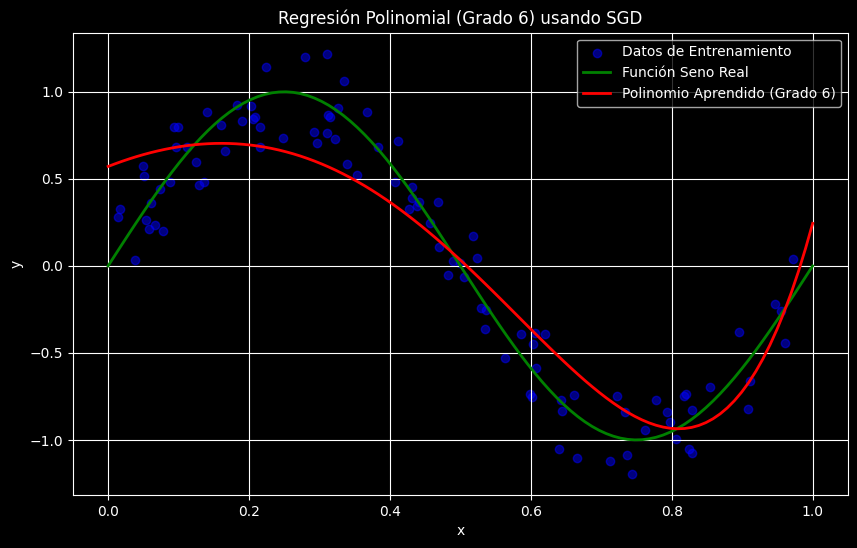

In [6]:
# Visualización inicial de resultados
plot_results(X, y, theta_final, degree_val)


Entrenando modelo con degree=3 y alpha=0.01
Epoch 0: cost = 0.20530872640280834
Epoch 100: cost = 0.08684109572102497
Epoch 200: cost = 0.08521830580568462
Epoch 300: cost = 0.0837518911155653
Epoch 400: cost = 0.08258264878536387


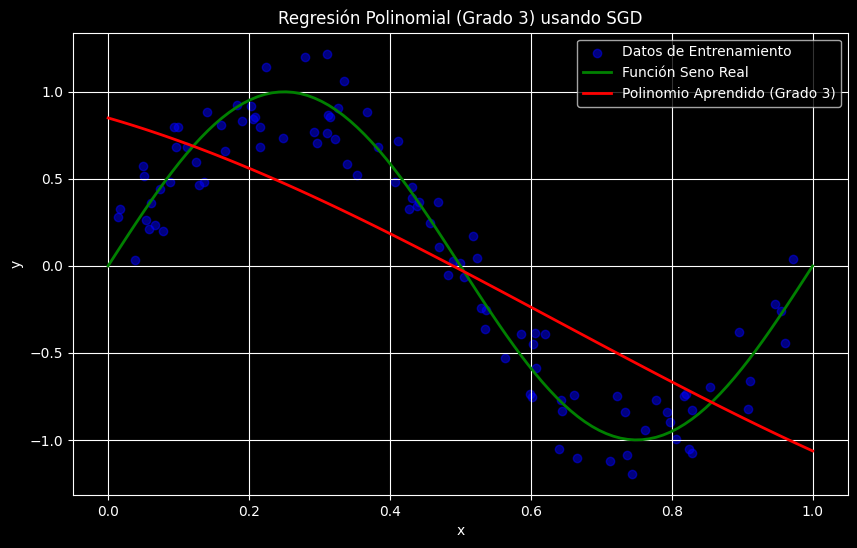


Entrenando modelo con degree=3 y alpha=0.05
Epoch 0: cost = 0.11593344756447305
Epoch 100: cost = 0.08133962515228975
Epoch 200: cost = 0.07416864944414103
Epoch 300: cost = 0.06970637937842936
Epoch 400: cost = 0.06618362878348394


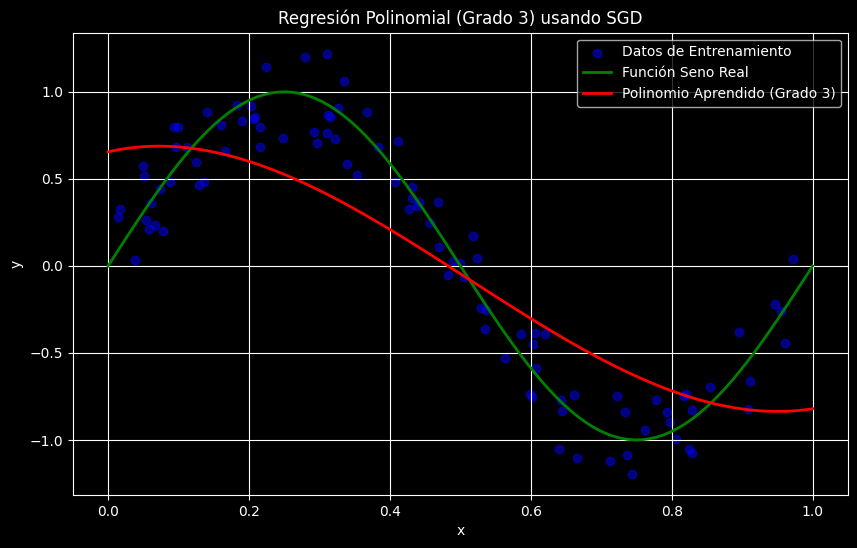


Entrenando modelo con degree=3 y alpha=0.1
Epoch 0: cost = 0.11006786911475538
Epoch 100: cost = 0.07697280581210984
Epoch 200: cost = 0.06723289362818535
Epoch 300: cost = 0.059470917039298465
Epoch 400: cost = 0.05281441276699164


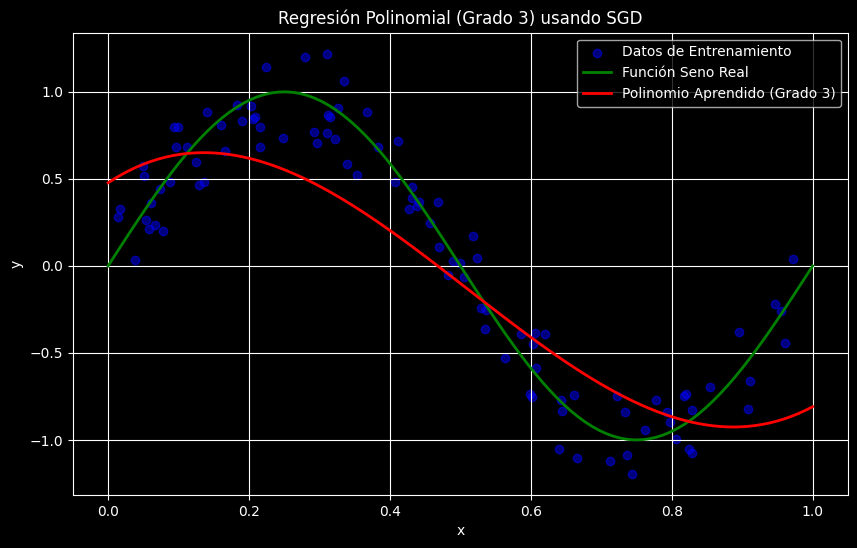


Entrenando modelo con degree=6 y alpha=0.01
Epoch 0: cost = 0.1498721095475897
Epoch 100: cost = 0.0632131648774871
Epoch 200: cost = 0.05594668491754632
Epoch 300: cost = 0.05040515690491398
Epoch 400: cost = 0.045769787979463385


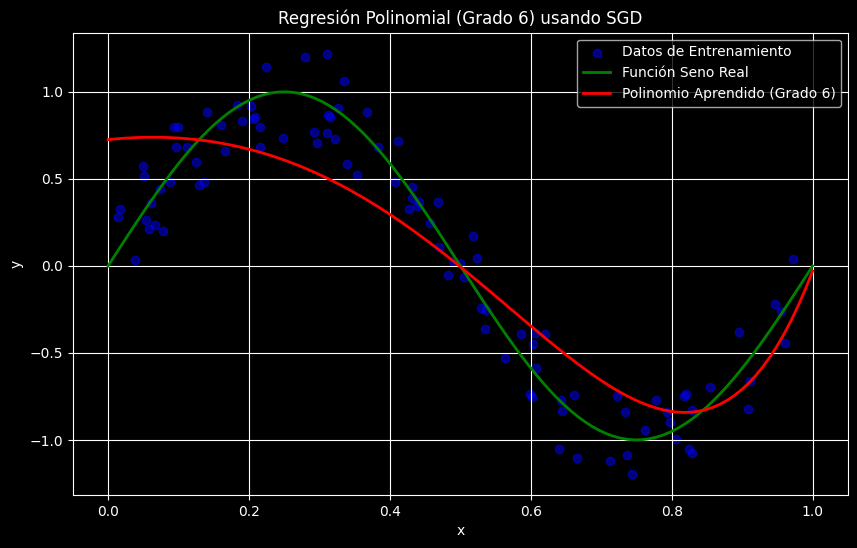


Entrenando modelo con degree=6 y alpha=0.05
Epoch 0: cost = 0.12160771363807141
Epoch 100: cost = 0.04246488025862953
Epoch 200: cost = 0.03042740158468702
Epoch 300: cost = 0.030653817338889677
Epoch 400: cost = 0.02353802265746041


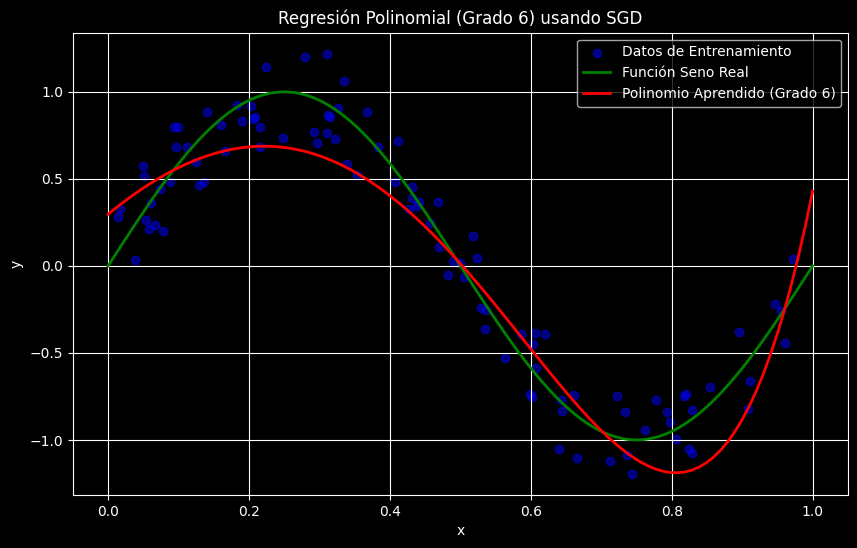


Entrenando modelo con degree=6 y alpha=0.1
Epoch 0: cost = 0.12352607449304935
Epoch 100: cost = 0.03241051595128143
Epoch 200: cost = 0.023580881093831513
Epoch 300: cost = 0.02141527589046182
Epoch 400: cost = 0.021256147771305516


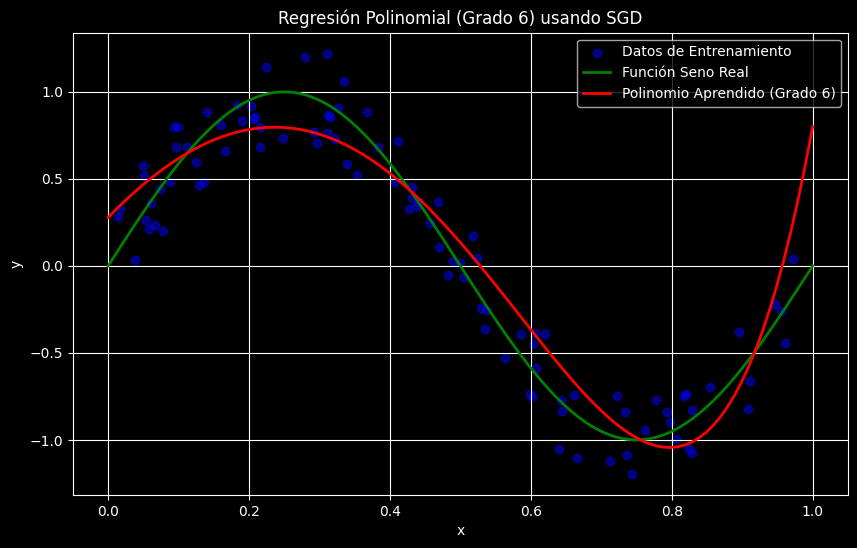


Entrenando modelo con degree=9 y alpha=0.01
Epoch 0: cost = 0.21392315463326192
Epoch 100: cost = 0.04930978442908513
Epoch 200: cost = 0.043098674120020455
Epoch 300: cost = 0.03907559654151586
Epoch 400: cost = 0.0363897895234926


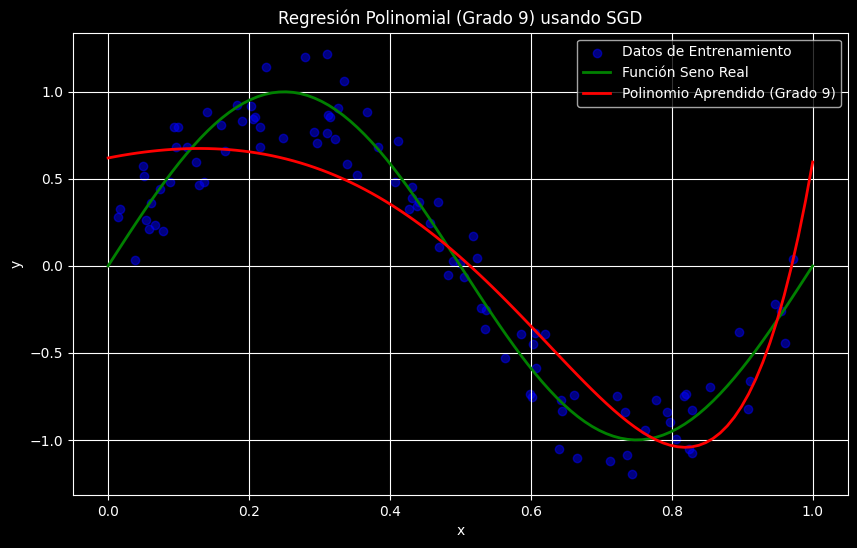


Entrenando modelo con degree=9 y alpha=0.05
Epoch 0: cost = 0.11824359365692755
Epoch 100: cost = 0.03679890359099211
Epoch 200: cost = 0.032249396947689885
Epoch 300: cost = 0.02964164258109092
Epoch 400: cost = 0.028514437116997114


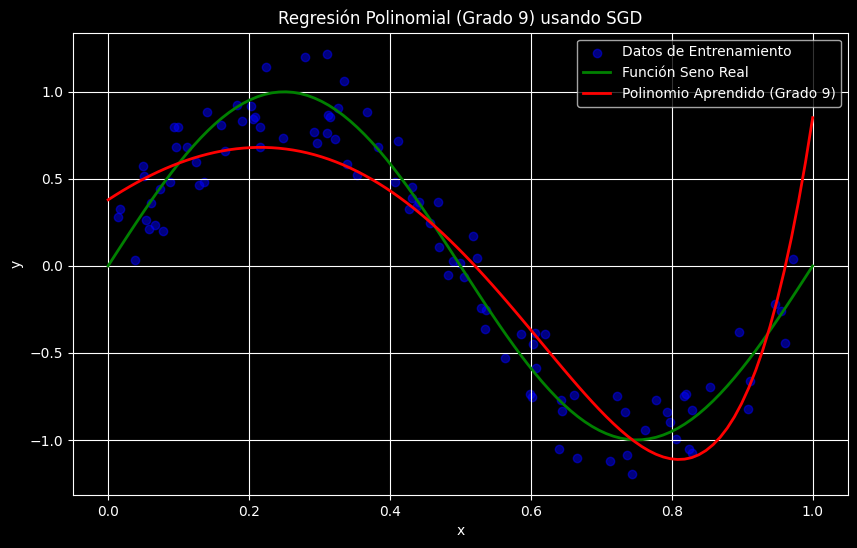


Entrenando modelo con degree=9 y alpha=0.1
Epoch 0: cost = 0.11661802253144192
Epoch 100: cost = 0.031561245816990366
Epoch 200: cost = 0.02811899632166247
Epoch 300: cost = 0.027590537005423275
Epoch 400: cost = 0.03044353388147187


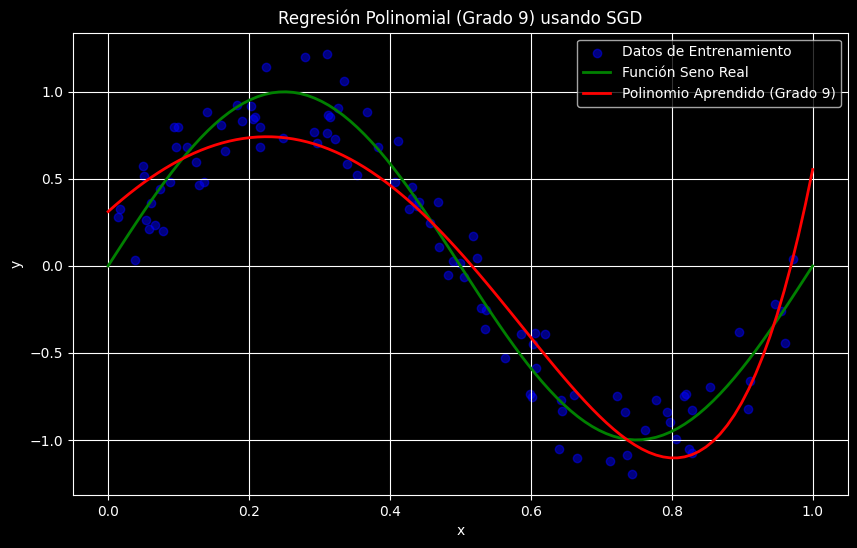

In [8]:
# Experimentación con diferentes valores de degree y alpha para acelerar el aprendizaje
degrees = [3, 6, 9]
alphas = [0.01, 0.05, 0.1]

best_model = {
    'cost': float('inf'),
    'degree': None,
    'alpha': None,
    'theta': None,
    'cost_history': None
}

for d in degrees:
    for a in alphas:
        print(f"\nEntrenando modelo con degree={d} y alpha={a}")
        theta_exp, history = sgd(X, y, alpha=a, epochs=500, degree=d)
        plot_results(X, y, theta_exp, d)
        
        final_cost = history[-1]
        if final_cost < best_model['cost']:
            best_model.update({
                'cost': final_cost,
                'degree': d,
                'alpha': a,
                'theta': theta_exp,
                'cost_history': history
            })

In [12]:
print(best_model["degree"])
print(best_model["alpha"])
print(best_model["cost"])

6
0.1
0.02110006005696266


### Reporte de Resultados: Mejor Modelo

Basado en los experimentos realizados, el mejor modelo se obtuvo con los siguientes parámetros:

*   **Grado del Polinomio (Degree):** 6
*   **Tasa de Aprendizaje (Alpha):** 0.1
*   **Costo Final (MSE):** 0.021100

El valor de **alpha = 0.1** resultó ser el más óptimo para este conjunto de datos, permitiendo una convergencia eficiente hacia el mínimo del error.

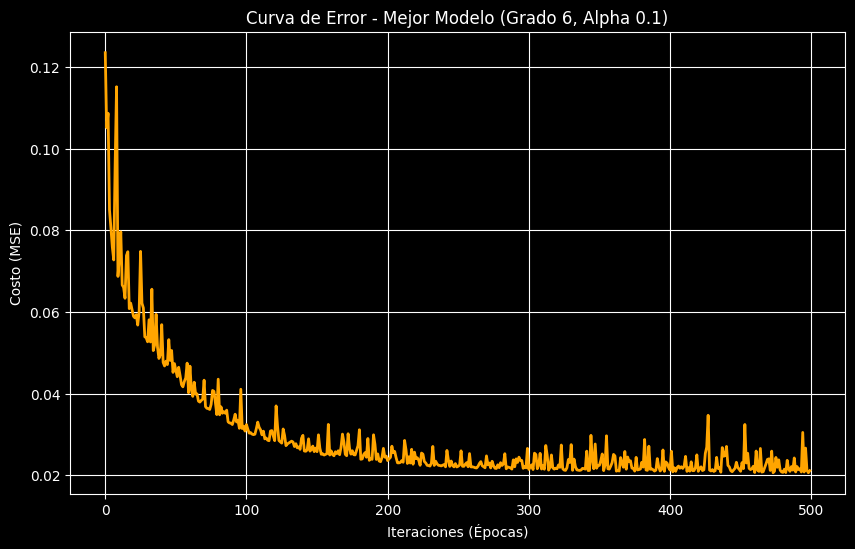

In [10]:
# Visualización de la Curva de Error del Mejor Modelo
plt.figure(figsize=(10, 6))
plt.plot(range(len(best_model['cost_history'])), best_model['cost_history'], color='orange', linewidth=2)
plt.title(f'Curva de Error - Mejor Modelo (Grado {best_model["degree"]}, Alpha {best_model["alpha"]})')
plt.xlabel('Iteraciones (Épocas)')
plt.ylabel('Costo (MSE)')
plt.grid(True)
plt.show()
